In [1]:
# I think first I need to load the dataset.

In [2]:
# Then I will apply varioius models

In [3]:
# First, if I remember correctly, is the linear regression

In [4]:
# This model may not be strong enough to predict the image number

In [5]:
# Anyway I will start the dataset loading

In [6]:
# Load the training dataset by setting the parameters train 
# to True and convert it to a tensor by placing a transform 
# object in the argument transform.

In [7]:
# I guess the torch package is always welcome
import torch

In [8]:
# I need some packages, this one is for dataset loading
import torchvision.datasets as dsets
# This one is for dataset transformation
import torchvision.transforms as transforms

In [9]:
dataset = dsets.MNIST(root = './data', train = False, download = True, 
                      transform = transforms.ToTensor())
print("Print the dataset:\n ", dataset)

Print the dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [10]:
dataset[0][1]

tensor(7)

In [11]:
# Since the tensor values are actually gray value, 
# therefore I need a function to print this image

# I need plotting packages like matplotlib.pylab
import matplotlib.pylab as plt

# The array package numpy
import numpy as np

In [12]:
def show_data(dataset):
    plt.imshow(dataset[0].numpy().reshape(28, 28), cmap = 'gray')
    plt.title ('y = ' + str(dataset[1]))

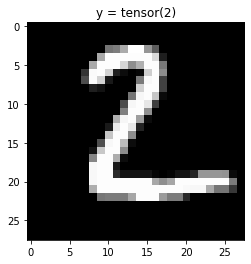

In [13]:
show_data(dataset[1])

In [14]:
# print("The label: ", dataset[1][1])

In [15]:
# print("The image: ", show_data(dataset[1]))

In [16]:
# show_data(dataset[2])

In [17]:
# Okay, now I know that the [x][0] is the image of the xth

In [18]:
# And the [x][1] is the label of xth image

In [19]:
# Now I need to define a model, how about one neural

In [20]:
# To use the neural network, I need the nn package
from torch import nn
torch.manual_seed(1)

In [21]:
# Before I apply it to the actual MNIST dataset, 
# I may better practice it on small datasets

In [22]:
# How about basic linear regression?
# First I need to create the datasets

In [23]:
# I need a function to help me visiualize the data space
# and the parameter space during training, though has nothing to do
# with the PyTorch

In [24]:
class plot_diagram():
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        # So the start is the .data of w tensor, which is -10 at 
        # begining
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        # X is -3, -2.9 .... 2.9
        # Y is -3 * X + random variable
        self.Y = Y.numpy()
        # Numpy90 can turn tensor into arrays
        self.parameter_values = torch.arange(start, stop)
        # This torch tesnor is from -10 to the stop values, 
        # namely the -10, -9,..., 5
        # So far I only know that the torch.arrange returns tensor
        # that ranges from start to stop
        self.Loss_function = [criterion(forward(X), Y) 
                              for w.data in self.parameter_values]
        # Because the forward functions requires the w value, so we use 
        # A for loop here to updates the w values everytime we use the 
        # criterion functions and store the results to an array, thus
        # this line of code is simply updating the w value while store
        # the results
        w.data = start
        # after computing all the losses, we reassign the w.data 
        # to the start, which is -10 in this linear regression
        
        # Okay the loss_function is a little confusing now
        
        # It gets less confusing! As a matter of fact, __init__
        # method just records all the losses corresponding to the 
        # weight
        
    def __call__(self, Yhat, w, error, n):
        # From the parameters of this function you can guess
        # it's about the relationships between the predicted
        # value and parameter, loss, and number of iterations.
        self.error.append(error)
        # Here the error is recorded, I think it's one to one to prmt
        self.parameter.append(w.data)
        # Here we record the parameter currently w holds
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        # We plot the predicted value and X, because Y is a function 
        # of the X, so we use the detach().numpy() 
        plt.plot(self.X, self.Y, 'ro')
        # Other than the predicted value, we print the actual value
        plt.xlabel("A")
        plt.ylim(-20, 20)
        
        plt.subplot(211)
        plt.title("""Data Space (top) Estimated Line (bottom) 
                  Iteration """)
        print(self.Loss_function)
        loss_list = []
        for each in self.Loss_function:
            loss_list.append(each.detach().item())
        # Because each value in the Loss_function array is computed
        # from the weight and input data, we need to detach it
        plt.plot(self.parameter_values.detach().numpy(), loss_list)
        # We plot the parameter values, and it's from -10 to 5
        # The y axis is values of the loss values obatinaed from prmt
        plt.plot(self.parameter, self.error, 'ro')
        # We plot another picture with parameter and the error, 
        # The error is actually inputted when calling the method
        plt.xlabel("B")
        plt.figure()
    
    def __del__(self):
        plt.close('all')

In [25]:
# Okay the plotting function is making no sense to me right now

In [26]:
# So I am gonna first do the data, as it determines the way of plotting

In [27]:
# Also the way we apply this function indicates its strctures too

In [28]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

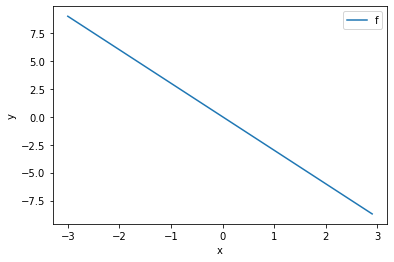

In [29]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
Y = f + 0.5 * torch.randn(X.size())

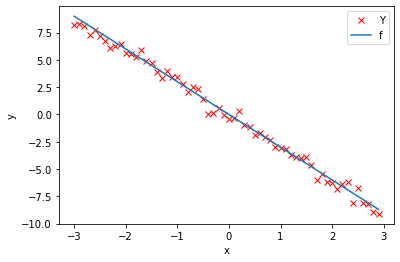

In [31]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
# Now I have the input variable, function output and observed output

In [33]:
# To define the prediction function:
def forward(x):
    return w * x

In [34]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [35]:
lr = 0.1
LOSS = []

In [36]:
# We need a variable as the initial parameter, 
# and train it via gradient descent

w = torch.tensor(-10.0, requires_grad = True)
# gradient_plot = plot_diagram(X, Y, w, stop =5)
# Okay now we are going to use the plot_diagram function

In [37]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [38]:
w.data

tensor(-10.)

In [39]:
X.numpy()

array([[-3. ],
       [-2.9],
       [-2.8],
       [-2.7],
       [-2.6],
       [-2.5],
       [-2.4],
       [-2.3],
       [-2.2],
       [-2.1],
       [-2. ],
       [-1.9],
       [-1.8],
       [-1.7],
       [-1.6],
       [-1.5],
       [-1.4],
       [-1.3],
       [-1.2],
       [-1.1],
       [-1. ],
       [-0.9],
       [-0.8],
       [-0.7],
       [-0.6],
       [-0.5],
       [-0.4],
       [-0.3],
       [-0.2],
       [-0.1],
       [ 0. ],
       [ 0.1],
       [ 0.2],
       [ 0.3],
       [ 0.4],
       [ 0.5],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [ 0.9],
       [ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9]], dtype=float32)

In [40]:
# Because the plot_diagram function's __call__ function doesn't
# occur alone without the training function, so we look at train
# functions first

In [41]:
def train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        # We get the predicted Yhat tensor(array) from X tensor (array)
        loss = criterion(Yhat, Y)
        # We compare the Yhat (w * x + bias) with the actual Y 
        gradient_plot(Yhat, w, loss.item(), epoch)
        # We plot the gradient with predicted value, parameter, loss
        # value and current epoch
        LOSS.append(loss.item())
        # We store the loss value to the LOSS array
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
        # Above three codes we update the parameter value with gradient

[tensor(148.7054, grad_fn=<MeanBackward0>), tensor(109.4815, grad_fn=<MeanBackward0>), tensor(76.2610, grad_fn=<MeanBackward0>), tensor(49.0438, grad_fn=<MeanBackward0>), tensor(27.8300, grad_fn=<MeanBackward0>), tensor(12.6195, grad_fn=<MeanBackward0>), tensor(3.4123, grad_fn=<MeanBackward0>), tensor(0.2085, grad_fn=<MeanBackward0>), tensor(3.0079, grad_fn=<MeanBackward0>), tensor(11.8108, grad_fn=<MeanBackward0>), tensor(26.6169, grad_fn=<MeanBackward0>), tensor(47.4264, grad_fn=<MeanBackward0>), tensor(74.2392, grad_fn=<MeanBackward0>), tensor(107.0554, grad_fn=<MeanBackward0>), tensor(145.8749, grad_fn=<MeanBackward0>)]
[tensor(148.7054, grad_fn=<MeanBackward0>), tensor(109.4815, grad_fn=<MeanBackward0>), tensor(76.2610, grad_fn=<MeanBackward0>), tensor(49.0438, grad_fn=<MeanBackward0>), tensor(27.8300, grad_fn=<MeanBackward0>), tensor(12.6195, grad_fn=<MeanBackward0>), tensor(3.4123, grad_fn=<MeanBackward0>), tensor(0.2085, grad_fn=<MeanBackward0>), tensor(3.0079, grad_fn=<MeanBac

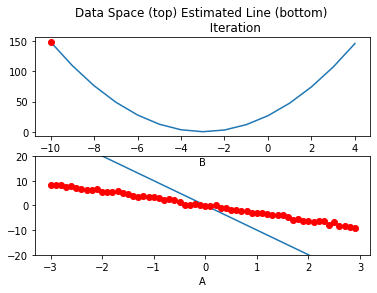

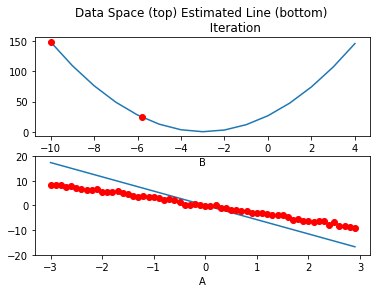

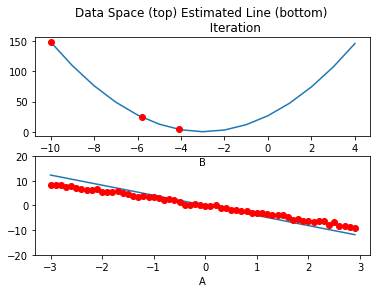

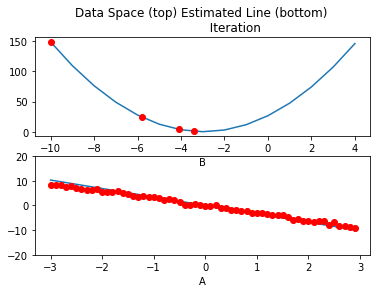

<Figure size 432x288 with 0 Axes>

In [42]:
w = torch.tensor(-10.0, requires_grad = True)
train_model(4)